# Assignment 1

## Part 1:   

In [2]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [4]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values


In [6]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [7]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

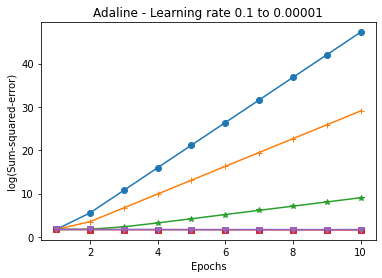

In [10]:
ada1 = AdalineGD(n_iter=10, eta=0.1).fit(X, y)
plt.plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o', label='.1')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
plt.plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), maarker='+', label='.01')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(X, y)
plt.plot(range(1, len(ada3.cost_) + 1), np.log10(ada3.cost_), marker='*', label='.001')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
plt.plot(range(1, len(ada4.cost_) + 1), np.log10(ada4.cost_), marker='s', label='.0001')

 
ada5 = AdalineGD(n_iter=10, eta=0.00001).fit(X, y)
plt.plot(range(1, len(ada5.cost_) + 1), np.log10(ada5.cost_), marker='v', label='.00001')

plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.1 to 0.00001')

plt.show()

## Part 2:

In [26]:
import os
import pandas as pd

df1 = pd.read_csv('data1.txt', sep=" ", header=None, encoding='utf-8')
df1.columns = ["a","b","c"]

df1.tail()


,a,b,c
806,-1,0.595622,0.871053
807,-1,0.625576,0.869298
808,-1,0.648618,0.857018
809,-1,0.637097,0.839474
810,-1,0.641705,0.804386


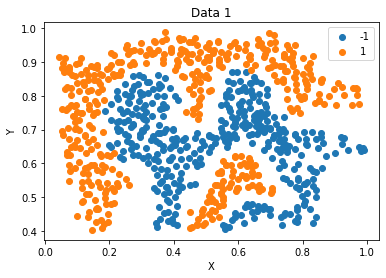

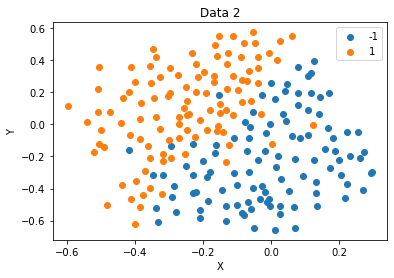

In [28]:
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv('data1.txt', sep=" ", header=None, encoding='utf-8')
df1.columns = ["a","b","c"]

#y1 = df1.iloc[0:100, 2].values
#X1 = df1.iloc[0:100, 1].values


groups = df1.groupby("a")
for name, group in groups:
    plt.scatter(group.b, group.c, marker='o', label=name)
    
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Data 1")

plt.show()


df2 = pd.read_csv('data2.txt', sep=" ", header=None, encoding='utf-8')
df2.columns = ["d","e","f"]

#y2 = df1.iloc[0:100, 2].values
#X2 = df1.iloc[0:100, 1].values


groups = df2.groupby("d")
for name, group in groups:
    plt.scatter(group.e, group.f, marker='o', label=name)
    
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Data 2")

plt.show()

